# Richest Athlete in the world Forbes List 

In [4]:
!pip install pycountry

  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=f1822573d5ad62783105bed2e837322865d0d593fb4f2297ec83cec3971f60a5
  Stored in directory: C:\Users\hp\AppData\Local\pip\Cache\wheels\33\4e\a6\be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [2]:
!pip install folium

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
%matplotlib inline
sns.set()
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)
import folium
from folium import plugins

from PIL import Image
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = 8, 5

import warnings
warnings.filterwarnings("ignore")
import os

C:\Users\hp\Documents\Python Scripts\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
print(os.listdir(r"C:\Users\hp\Desktop\New folder\Python Object and Data Structure Basics\csv file\All Files\All Files"))

['2010-capitalbikeshare-tripdata.xlsx', 'Advartising.csv', 'anime.csv', 'anscombe.csv', 'attention.csv', 'Automobiledata.csv', 'BankingChurners.csv', 'Boston.csv', 'brain_networks.csv', 'breastCancer.csv', 'breastcancerdata.csv', 'California House Price.csv', 'CarPrice Prediction.csv', 'car_crashes.csv', 'Churn.csv', 'Classifieddata.csv', 'Country.csv', 'CountryNotes.csv', 'Cricket testdataset1.csv', 'cricket traindataset.csv', 'datasets_105471_251283_data.csv', 'datasets_11167_15520_test.csv', 'datasets_11167_15520_train.csv', 'datasets_1489_2704_auto-mpg.csv', 'datasets_201575_443946_Cricket_chirps.csv', 'datasets_2179_10093_Interview.csv', 'datasets_228_482_diabetes.csv', 'datasets_31481_40149_petrol_consumption.csv', 'datasets_33080_43333_car data.csv', 'datasets_33180_43520_heart.csv', 'datasets_383055_741735_CarPrice_Assignment.csv', 'datasets_383055_741735_Data Dictionary.xlsx', 'datasets_4458_8204_winequality-red.csv', 'datasets_4471_6849_bank.csv', 'datasets_535863_984605_Fore

In [13]:
df = pd.read_csv(r"C:\Users\hp\Desktop\New folder\Python Object and Data Structure Basics\csv file\All Files\All Files\ForbesRichestAtheletes(Forbes Richest Athletes 1990-2020).csv")
df.head(5)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [14]:
df1 = df.copy()
df1.drop('S.NO', axis= 1, inplace= True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    277 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


In [15]:
df1.columns

Index(['Name', 'Nationality', 'Current Rank', 'Previous Year Rank', 'Sport',
       'Year', 'earnings ($ million)'],
      dtype='object')

In [17]:
df1.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1990,Mike Tyson,USA,1,NaN,BOXING,28.6
1990,Buster Douglas,USA,2,NaN,BOXING,26.0
1990,Sugar Ray Leonard,USA,3,NaN,BOXING,13.0
1990,Ayrton Senna,Brazil,4,NaN,AUTO RACING,10.0
1990,Alain Prost,France,5,NaN,AUTO RACING,9.0


In [16]:
df1['Year'] = df1['Year'].apply(pd.to_datetime, format="%Y")

df1['year'] = pd.DatetimeIndex(df1['Year']).year
df1.set_index('year',inplace= True)
df1.drop('Year', axis= 1, inplace= True)

df1['Sport'] = df1['Sport'].str.upper()
df1.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1990,Mike Tyson,USA,1,NaN,BOXING,28.6
1990,Buster Douglas,USA,2,NaN,BOXING,26.0
1990,Sugar Ray Leonard,USA,3,NaN,BOXING,13.0
1990,Ayrton Senna,Brazil,4,NaN,AUTO RACING,10.0
1990,Alain Prost,France,5,NaN,AUTO RACING,9.0


In [30]:
from plotly.offline import init_notebook_mode, iplot

data_2020 = df1[df1.index == 2020]

trace = go.Bar(
                    x = data_2020["earnings ($ million)"],
                    y = data_2020["Name"],
                    orientation= 'h',
                    marker = dict(color = 'pink',
                                 line = dict(color = 'black', width= 1)),
                    )

data = [trace]
layout = go.Layout(barmode= "group", title = "World's Highest-Paid Atheletes in 2020", width= 800, height= 500,
                      #xaxis= dict(title= 'No of times ranked highest'),
                      yaxis= dict(autorange="reversed"),
                      showlegend= False)

fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [31]:
Top_paid_each_year = df1[df1['Current Rank'] == 1].sort_values(by= 'year', ascending =False)

z = Top_paid_each_year[['Name', 'Sport', 'Nationality', 'earnings ($ million)']]


z.style.background_gradient(cmap='Reds')

,Name,Sport,Nationality,earnings ($ million)
year,,,,
2020,Roger Federer,TENNIS,Switzerland,106.300000
2019,Lionel Messi,SOCCER,Argentina,127.000000
2018,Floyd Mayweather,BOXING,USA,285.000000
2017,Cristiano Ronaldo,SOCCER,Portugal,93.000000
2016,Cristiano Ronaldo,SOCCER,Portugal,88.000000
2015,Floyd Mayweather,BOXING,USA,300.000000
2014,Floyd Mayweather,BOXING,USA,105.000000
2013,Tiger Woods,GOLF,USA,78.100000
2012,Floyd Mayweather,BOXING,USA,85.000000


In [40]:
counts_top = Top_paid_each_year['Name'].value_counts().to_frame()


trace = go.Bar(
                    y = counts_top.index,
                    x = counts_top['Name'],
                    orientation='h',
                    marker = dict(color= 'pink',
                                 line= dict(color= 'black', width= 1)),
                )

data = [trace]

layout = go.Layout(barmode = "group", title= 'Athelet Earning the most, maximum number of times', width= 800, height= 500,
                  xaxis= dict(title = 'No of times ranked highest'),
                  yaxis= dict(autorange= 'reversed'),
                  showlegend= False)

fig = go.Figure(data= data, layout = layout)
iplot(fig)

In [41]:
total_earnings = Top_paid_each_year.groupby('Name')['earnings ($ million)'].sum().to_frame().reset_index()
top_ranks = Top_paid_each_year['Name'].value_counts().to_frame().reset_index()

top_ranks.rename(columns= {'index': 'Name',
                          'Name': 'Rank_counts'}, inplace= True)

df_compare = total_earnings.merge(top_ranks, on= 'Name')

In [42]:
df_compare

,Name,earnings ($ million),Rank_counts
0,Cristiano Ronaldo,181.0,2
1,Evander Holyfield,60.5,1
2,Floyd Mayweather,775.0,4
3,Lionel Messi,127.0,1
4,Michael Jordan,293.1,6
5,Michael Schumacher,108.0,2
6,Mike Tyson,103.6,2
7,Roger Federer,106.3,1
8,Tiger Woods,987.4,11


In [43]:
Top_paid_each_year

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
2020,Roger Federer,Switzerland,1,5,TENNIS,106.3
2019,Lionel Messi,Argentina,1,2,SOCCER,127.0
2018,Floyd Mayweather,USA,1,>100,BOXING,285.0
2017,Cristiano Ronaldo,Portugal,1,1,SOCCER,93.0
2016,Cristiano Ronaldo,Portugal,1,3,SOCCER,88.0
2015,Floyd Mayweather,USA,1,1,BOXING,300.0
2014,Floyd Mayweather,USA,1,14,BOXING,105.0
2013,Tiger Woods,USA,1,3,GOLF,78.1
2012,Floyd Mayweather,USA,1,?,BOXING,85.0


In [45]:
import plotly.graph_objs as go
from plotly import tools
trace0 = go.Bar(
                y = df_compare['Name'],
                x = df_compare['Rank_counts'],
                marker= dict(color= 'rgba(171, 50, 96, 0.6)', line = dict(color = 'rgba(171,50,96,1.0)', width= 1)),
                name= 'Top Ranks',
                orientation= 'h',
                
)

trace1 = go.Scatter(
                    y = df_compare['Name'],
                    x = df_compare['earnings ($ million)'],
                    mode = 'lines+markers',
                    line= dict(color= 'rgb(63,72,204)'),
                    name= 'income',
)


layout = dict(
                title= 'Income and Top Ranks',
                yaxis= dict(showticklabels= True, domain= [0, 0.85]),
                yaxis2= dict(showticklabels=False, linecolor= 'rgba(102,102,102,0.8)', linewidth=2, domain=[0, 0.85]),
                xaxis= dict(zeroline=False, showline= False, showticklabels=True, showgrid=True, domain= [0, 0.42]),

                xaxis2 = dict(zeroline= False, showline= False, showticklabels= False, showgrid= True, domain= [0.47, 1], side= 'top', dtick=25 ),
                legend=dict(x=0.029,y=1.038,font=dict(size=10)),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',

)


annotations = []
y_s = df_compare['Rank_counts']
y_nw = np.rint(df_compare['earnings ($ million)'])
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, df_compare['Name']):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn-1,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd+1,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations


# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
fig.show()

In [46]:
counts_top = Top_paid_each_year['Nationality'].value_counts().to_frame()


trace= go.Bar(
                x= counts_top.index,
                y = counts_top['Nationality'],
                orientation = 'v',
                marker = dict(color= 'pink',
                             line= dict(color= 'black', width = 1)),
                
)

data = [trace]

layout = go.Layout(barmode = "group", title = "Country which produces the maximum earners in Sports", width = 800, height= 500,
                  xaxis= dict(title= 'No of times ranked highest'),
                  #yaxis= dict(autorange= "reversed"),
                  showlegend = False)

fig = go.Figure(data = data, layout = layout)

iplot(fig)                  

In [47]:
s = df['Name'].value_counts().to_frame()[:5]
s.style.background_gradient(cmap='Reds')

,Name
Tiger Woods,19
Michael Jordan,19
Kobe Bryant,14
Michael Schumacher,13
LeBron James,13


In [48]:
names = df['Name'].value_counts().to_frame()

names[names['Name']==1].index

monica = df[df['Name'] == 'Monica Seles']
monica.style.set_properties(**{'background-color': 'pink',
                              'color': 'black',
                              'border-color': 'black'})

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
29,30,Monica Seles,USA,10,12,Tennis,1992,8.500000


In [51]:
top_earners_alltime = pd.pivot_table(df, index= 'Name', values='earnings ($ million)', aggfunc= 'sum')
top3_earners_all = top_earners_alltime.sort_values(by= "earnings ($ million)", ascending= False)[:3]


top3_earners_all.style.background_gradient(cmap='Reds')

,earnings ($ million)
Name,
Tiger Woods,1373.800000
LeBron James,844.800000
Floyd Mayweather,840.000000


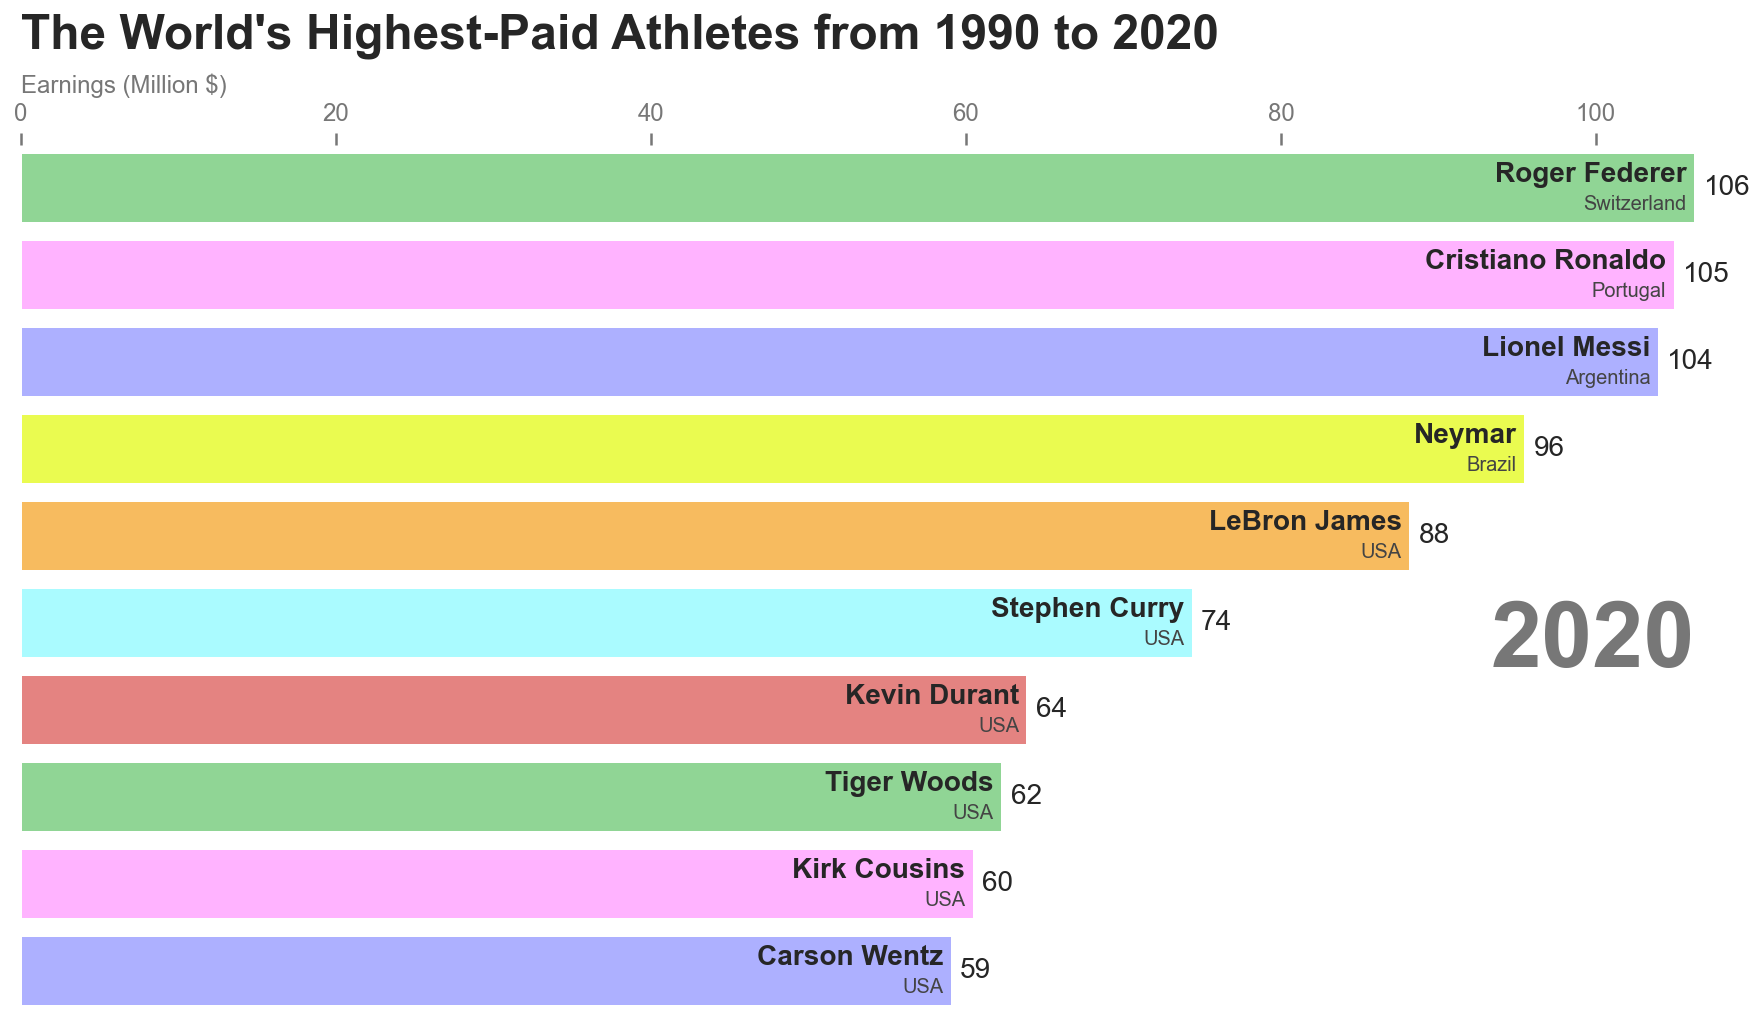

In [53]:
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

data = df[['Name','Nationality','Year','earnings ($ million)']]
data.rename(columns={'earnings ($ million)':'value'},inplace=True)

group_lk = df.set_index('Name')['Nationality'].to_dict()

colors = ["#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff", "#f7bb5f", "#eafb50"]



fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(current_year):
    dff = data[data['Year'].eq(current_year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Name'], dff['value'],color=colors)
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['Name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Earnings (Million $)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, "The World's Highest-Paid Athletes from 1990 to 2020",
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='white')
    plt.box(False)
    
draw_barchart(2020)

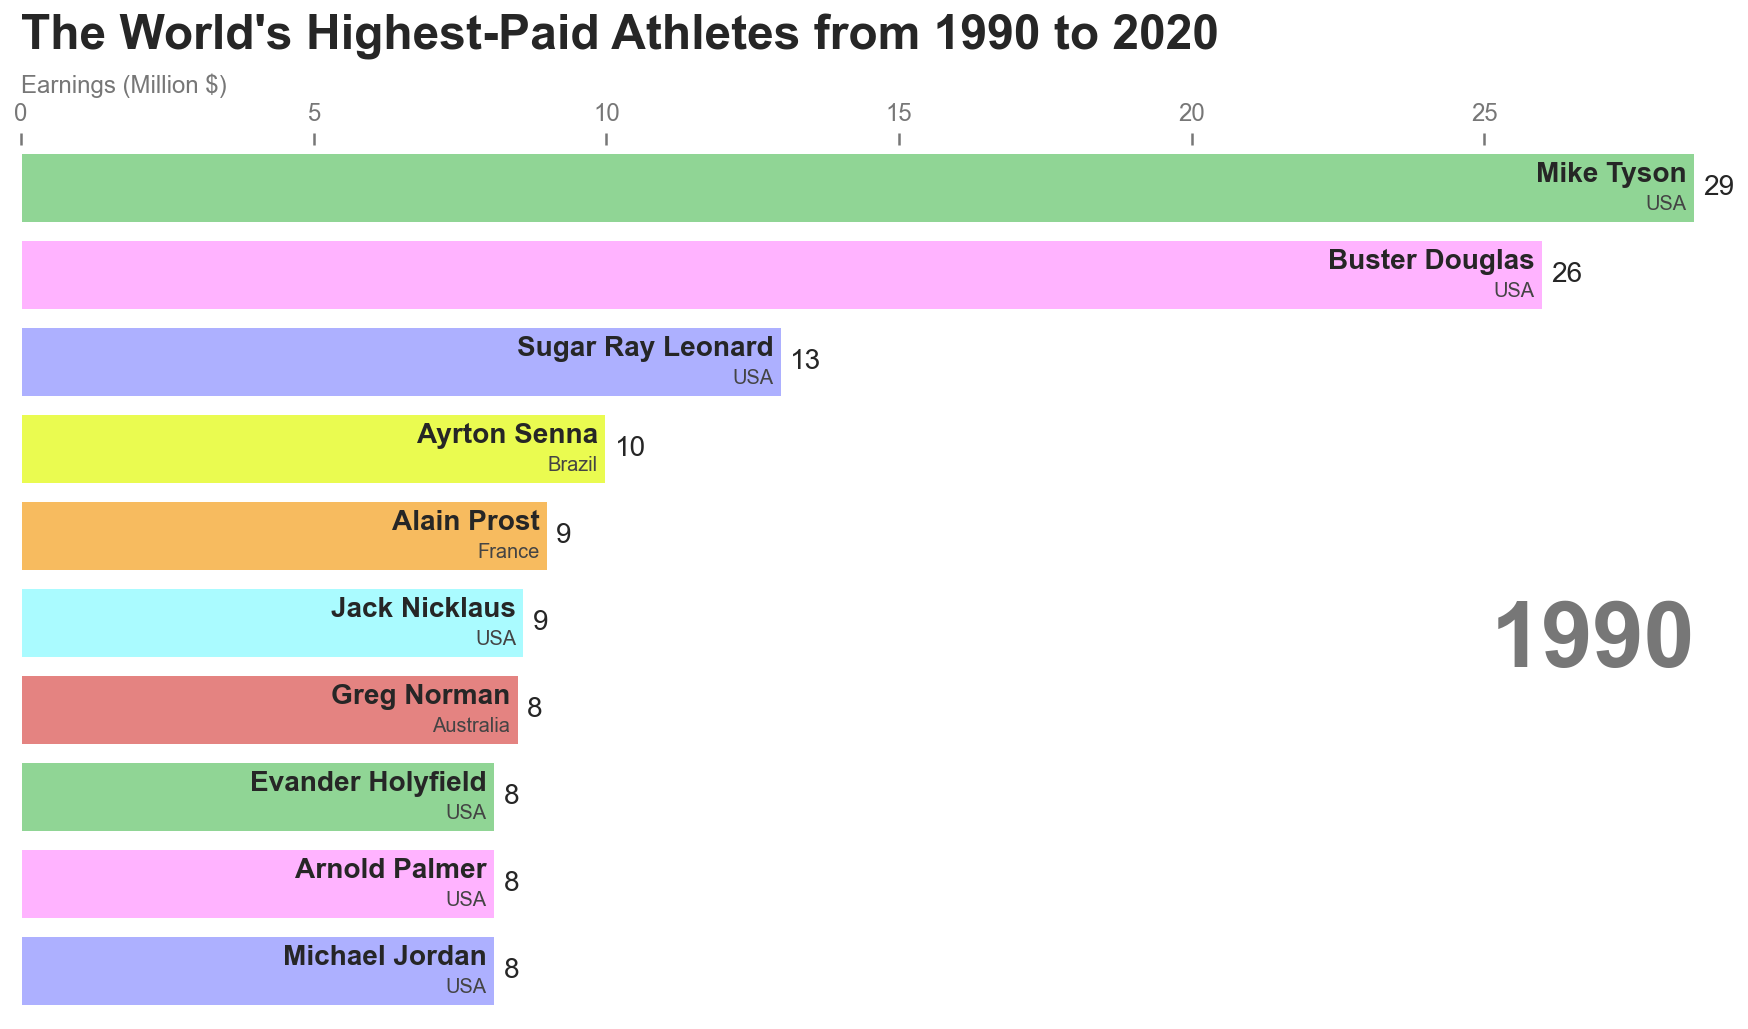

In [54]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1990, 2020))
HTML(animator.to_jshtml())